# Confusion matrix for different sampling sizes

In [20]:
import sys
sys.path.append('../')
from utility.file_utility import FileUtility
import matplotlib.pyplot as plt
%pylab inline
%matplotlib inline 
from utility.visualization_utility import create_mat_plot


Populating the interactive namespace from numpy and matplotlib


In [38]:
files=FileUtility.recursive_glob('../../datasets/results/body-sites/sample-size/','*.pickle')

In [39]:
res_dict=dict()
for file in files:
    [label_set, conf, best_score_, best_estimator_, cv_results_, best_params_]=FileUtility.load_obj(file)
    res_dict['All' if (file.split('/')[-1].split('.')[0].split('_')[2]) =='-1' else (file.split('/')[-1].split('.')[0].split('_')[2])]=conf

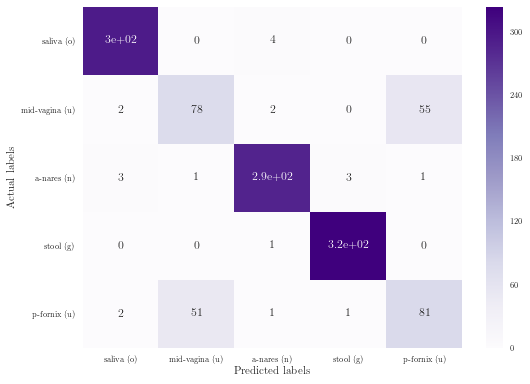

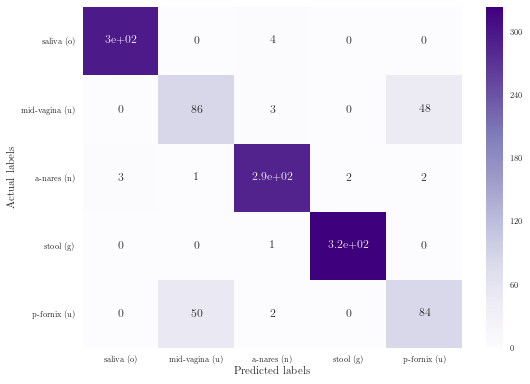

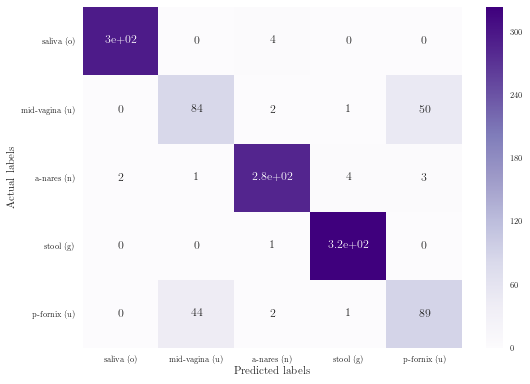

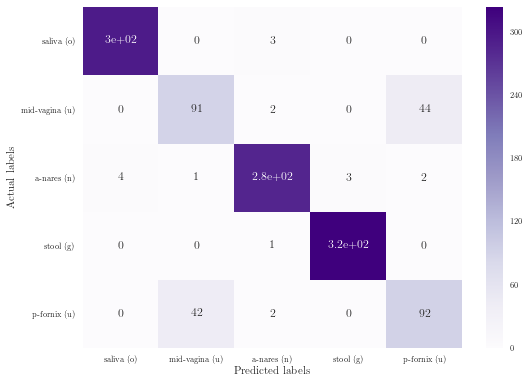

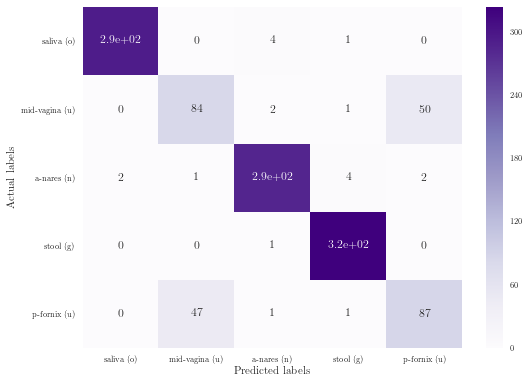

In [41]:
sampling_sizes=list(res_dict.keys())
sampling_sizes.sort()
for i,sampling in enumerate(sampling_sizes):
    create_mat_plot(res_dict[sampling], ['saliva (o)', 'mid-vagina (u)','a-nares (n)', 'stool (g)', 'p-fornix (u)'], '', 'body-site_confusion'+'_samplingsize'+sampling, 'Predicted labels' ,'Actual labels', cmap='Purples', filetype='pdf',font_s=8)
    

# Run-time analysis

### Classification

In [43]:
from classifier.classical_classifiers import RFClassifier,SVM
from utility.file_utility import FileUtility
import timeit


In [ ]:
start = timeit.default_timer()

X=FileUtility.load_sparse_csr('../../MicroPheno_datasets/body-sites/k-mer_representations_labels/6-mers_rate_5000.npz')
Y=FileUtility.load_list('../../MicroPheno_datasets/body-sites/k-mer_representations_labels/labels_phen.txt')
#### Random Forest classifier
MRF = RFClassifier(X, Y)
# results containing the best parameter, confusion metrix, best estimator, results on fold will be stored in this address
MRF.tune_and_eval('../../MicroPheno_datasets/body-sites/classification_results',n_jobs=10)

stop = timeit.default_timer()
print (stop - start,'sec') 

In [ ]:
start = timeit.default_timer()

X=FileUtility.load_sparse_csr('../../MicroPheno_datasets/body-sites/k-mer_representations_labels/6-mers_rate_5000.npz')
Y=FileUtility.load_list('../../MicroPheno_datasets/body-sites/k-mer_representations_labels/labels_phen.txt')
#### Random Forest classifier
MRF = RFClassifier(X, Y)
# results containing the best parameter, confusion metrix, best estimator, results on fold will be stored in this address
MRF.tune_and_eval('../../MicroPheno_datasets/body-sites/classification_results',n_jobs=10)

stop = timeit.default_timer()
print (stop - start,'sec')